<a href="https://colab.research.google.com/github/Pruthvi84/Normalization-and-Classification-of-Histopathology-EHR-on-breast-cancer-using-NLP-and-ML-Approaches/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import pandas as pd
import nltk
import re
import numpy as np

In [ ]:
combined_df1 = pd.read_csv("tnm_combined.csv")
combined_df1.head()

,Unnamed: 0,T,N,M,Stage
0,0,2,1,0,IIB
1,1,2,0,0,IIA
2,2,2,0,0,IIA
3,3,2,0,0,IIA
4,4,2,0,0,IIA


In [ ]:
# combined_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1690 non-null   int64 
 1   T           1690 non-null   object
 2   N           1690 non-null   object
 3   M           1690 non-null   object
 4   Stage       1690 non-null   object
dtypes: int64(1), object(4)
memory usage: 66.1+ KB


In [ ]:
# ord(combined_df1.iloc[111,1])

116

In [ ]:
# from sklearn.preprocessing import LabelEncoder

In [ ]:
# lblEncoder_T = LabelEncoder()
# lblEncoder_T.fit(combined_df1['T'])
# combined_df1['T_new'] = lblEncoder_T.transform(combined_df1['T'])

In [ ]:
# lblEncoder_M = LabelEncoder()
# lblEncoder_M.fit(combined_df1['M'])
# combined_df1['M_new'] = lblEncoder_M.transform(combined_df1['M'])

In [ ]:
# lblEncoder_N = LabelEncoder()
# lblEncoder_N.fit(combined_df1['N'])
# combined_df1['N_new'] = lblEncoder_N.transform(combined_df1['N'])

# **SECTION 1**

In [ ]:
combined_df2 = pd.read_csv("edited_tnm_values.csv")
combined_df2.head()

,T_new,N_new,M_new,Stage_new
0,2,1,0,2
1,2,0,0,1
2,2,0,0,1
3,2,0,0,1
4,2,0,0,1


In [ ]:
combined_df2.Stage_new.nunique()

7

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X = combined_df2.drop('Stage_new', axis=1)
y = combined_df2['Stage_new']



In [ ]:
X.head(),y.head()

(   T_new  N_new  M_new
 0      2      1      0
 1      2      0      0
 2      2      0      0
 3      2      0      0
 4      2      0      0,
 0    2
 1    1
 2    1
 3    1
 4    1
 Name: Stage_new, dtype: int64)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=None)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 1521
X_test 169
y_train 1521
y_test 169


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn import metrics


# **Decision Tree Classification**


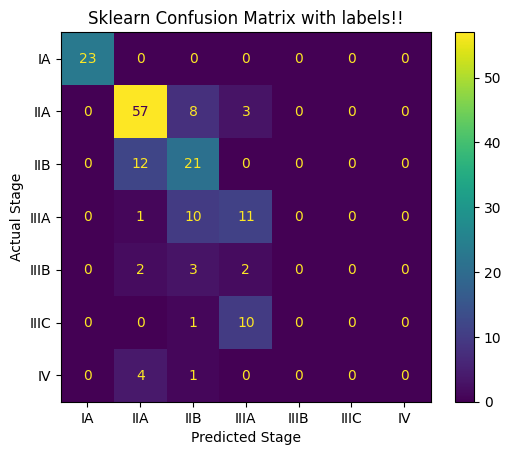

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
y_pred = dtree_model.predict(X_test)

# creating a confusion matrix

cm = confusion_matrix(y_test, y_pred)
    #Create the Confusion Matrix Display Object(cmd_obj).
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[ 'IA', 'IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC','IV'])

    #The plot() function has to be called for the sklearn visualization
cmd_obj.plot()

    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!',
                    xlabel='Predicted Stage',
                    ylabel='Actual Stage')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
plt.show()

# Calculating various metrics for Decision Tree Classification

In [ ]:
def print_scores( y_true, y_pred):

        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        print(metrics.classification_report(y_true, y_pred, digits=3))

print_scores( y_test, y_pred)
# print(metrics.classification_report(y_true, y_pred, digits=3))

accuracy:  0.6627218934911243
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        23
           1      0.750     0.838     0.792        68
           2      0.477     0.636     0.545        33
           3      0.423     0.500     0.458        22
           4      0.000     0.000     0.000         7
           5      0.000     0.000     0.000        11
           6      0.000     0.000     0.000         5

    accuracy                          0.663       169
   macro avg      0.379     0.425     0.399       169
weighted avg      0.586     0.663     0.621       169



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Sensitivity and Specificity - Decision Tree

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

print('Avg Sensitivity : ', TPR.sum()/7)
print('Avg Specificity :' ,TNR.sum()/7)


Avg Sensitivity :  0.42494270435446907
Avg Specificity : 0.9343889606762082


# **Gaussian Naive Bayes Classification**

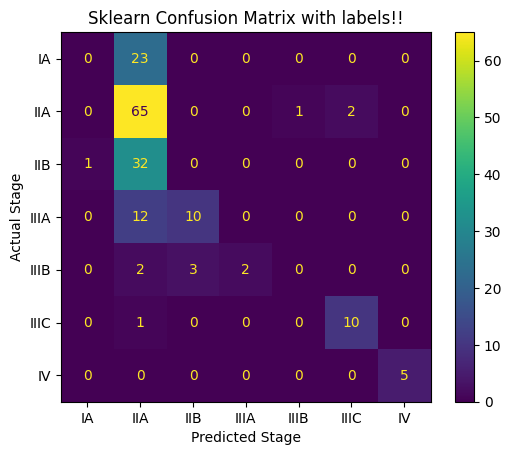

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
cm = confusion_matrix(y_test, gnb_predictions)
    #Create the Confusion Matrix Display Object(cmd_obj).
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[ 'IA', 'IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC','IV'])

    #The plot() function has to be called for the sklearn visualization
cmd_obj.plot()

    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!',
                    xlabel='Predicted Stage',
                    ylabel='Actual Stage')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
plt.show()

# Calculating Various Metrics for Gaussian Naive Bayes Classification

In [ ]:
def print_scores( y_true,gnb_predictions ):

        acc_score = accuracy_score(y_true, gnb_predictions)
        print("accuracy: ",acc_score)
        print(metrics.classification_report(y_true, gnb_predictions, digits=3))
print_scores( y_test, gnb_predictions)

accuracy:  0.47337278106508873
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        23
           1      0.481     0.956     0.640        68
           2      0.000     0.000     0.000        33
           3      0.000     0.000     0.000        22
           4      0.000     0.000     0.000         7
           5      0.833     0.909     0.870        11
           6      1.000     1.000     1.000         5

    accuracy                          0.473       169
   macro avg      0.331     0.409     0.359       169
weighted avg      0.278     0.473     0.344       169



Sensitivity and Specificity - Gaussian Naive Bayes

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

print('Avg Sensitivity : ', TPR.sum()/7)
print('Avg Specificity :' ,TNR.sum()/7)


Avg Sensitivity :  0.4092818945760123
Avg Specificity : 0.8817223761679358


# KNN Classification

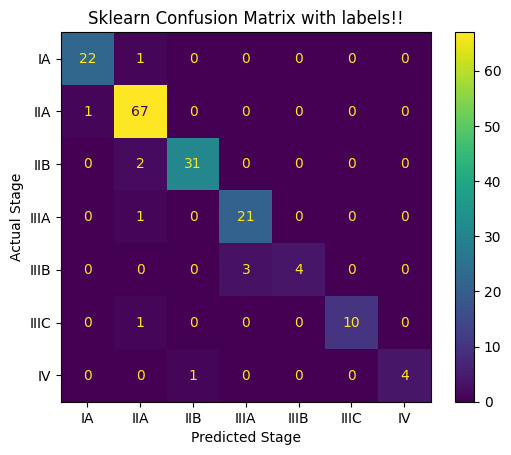

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

cm = confusion_matrix(y_test, knn_predictions)
    #Create the Confusion Matrix Display Object(cmd_obj).
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[ 'IA', 'IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC','IV'])

    #The plot() function has to be called for the sklearn visualization
cmd_obj.plot()

    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!',
                    xlabel='Predicted Stage',
                    ylabel='Actual Stage')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
plt.show()

## Calculating Various Metrics for KNN Classification

In [ ]:
def print_scores( y_true,knn_predictions ):

        acc_score = accuracy_score(y_true, knn_predictions)
        print("accuracy: ",acc_score)
        print(metrics.classification_report(y_true, knn_predictions, digits=3))
print_scores( y_test, knn_predictions)

accuracy:  0.9408284023668639
              precision    recall  f1-score   support

           0      0.957     0.957     0.957        23
           1      0.931     0.985     0.957        68
           2      0.969     0.939     0.954        33
           3      0.875     0.955     0.913        22
           4      1.000     0.571     0.727         7
           5      1.000     0.909     0.952        11
           6      1.000     0.800     0.889         5

    accuracy                          0.941       169
   macro avg      0.962     0.874     0.907       169
weighted avg      0.944     0.941     0.939       169



Sensitivity and Specificity - KNN Classification

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

print('Avg Sensitivity : ', TPR.sum()/7)
print('Avg Specificity :' ,TNR.sum()/7)

Avg Sensitivity :  0.8737535330337669
Avg Specificity : 0.9879835185706687


# **SVM Classification**

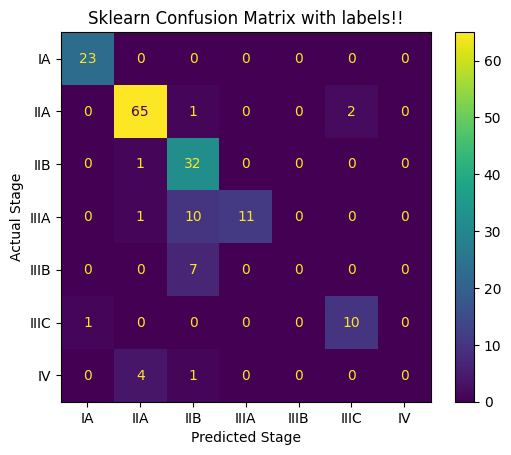

In [ ]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

cm = confusion_matrix(y_test, svm_predictions)
    #Create the Confusion Matrix Display Object(cmd_obj).
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[ 'IA', 'IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC','IV'])

    #The plot() function has to be called for the sklearn visualization
cmd_obj.plot()

    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!',
                    xlabel='Predicted Stage',
                    ylabel='Actual Stage')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
plt.show()

# Calculating Various Metrics for SVM Classification

In [ ]:
def print_scores( y_true,svm_predictions ):

        acc_score = accuracy_score(y_true, svm_predictions)
        print("accuracy: ",acc_score)
        print(metrics.classification_report(y_true, knn_predictions, digits=3))
print_scores( y_test, svm_predictions)

accuracy:  0.834319526627219
              precision    recall  f1-score   support

           0      0.957     0.957     0.957        23
           1      0.931     0.985     0.957        68
           2      0.969     0.939     0.954        33
           3      0.875     0.955     0.913        22
           4      1.000     0.571     0.727         7
           5      1.000     0.909     0.952        11
           6      1.000     0.800     0.889         5

    accuracy                          0.941       169
   macro avg      0.962     0.874     0.907       169
weighted avg      0.944     0.941     0.939       169



Sensitivity and Specificity - SVM Classification

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

print('Avg Sensitivity : ', TPR.sum()/7)
print('Avg Specificity :' ,TNR.sum()/7)

Avg Sensitivity :  0.6192386045327222
Avg Specificity : 0.9687686620194864


# **Random Forest Classification**

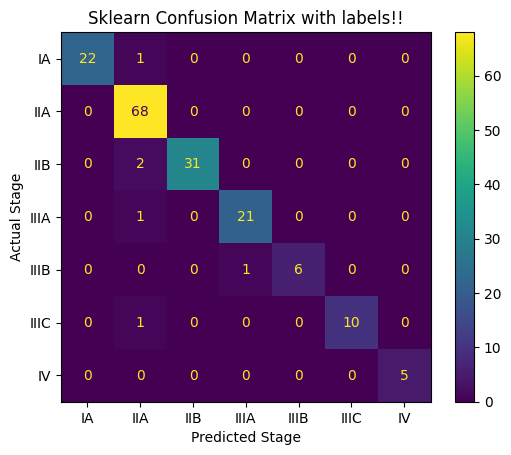

In [ ]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
# Create a Random forest Classifier
clf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
clf.fit(X_train, y_train)
rforest_predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, rforest_predictions)
    #Create the Confusion Matrix Display Object(cmd_obj).
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[ 'IA', 'IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC','IV'])
    #The plot() function has to be called for the sklearn visualization
cmd_obj.plot()
    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!',
                    xlabel='Predicted Stage',
                    ylabel='Actual Stage')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
plt.show()

# Calculating Various Metrics for Random Forest Classification

In [ ]:
def print_scores( y_true, rforest_predictions):

        acc_score = accuracy_score(y_true, rforest_predictions)
        print("accuracy: ",acc_score)
        print(metrics.classification_report(y_true, rforest_predictions, digits=3))

print_scores( y_test, rforest_predictions)

accuracy:  0.9644970414201184
              precision    recall  f1-score   support

           0      1.000     0.957     0.978        23
           1      0.932     1.000     0.965        68
           2      1.000     0.939     0.969        33
           3      0.955     0.955     0.955        22
           4      1.000     0.857     0.923         7
           5      1.000     0.909     0.952        11
           6      1.000     1.000     1.000         5

    accuracy                          0.964       169
   macro avg      0.984     0.945     0.963       169
weighted avg      0.967     0.964     0.964       169



Sensitivity and Specificity - Random Forest Classification

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

print('Avg Sensitivity : ', TPR.sum()/7)
print('Avg Specificity :' ,TNR.sum()/7)


Avg Sensitivity :  0.9452421284719421
Avg Specificity : 0.991956046916645


# **Gradient Boosting**

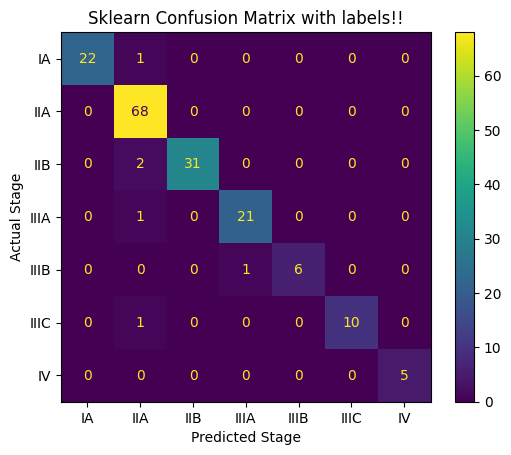

In [ ]:
# importing Gradient Boosting Classifier from assemble module
from sklearn.ensemble import GradientBoostingClassifier
# Create a Gradient Boost Classifier
gbc = GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=8 )

# Train the model using the training sets
gbc.fit(X_train, y_train)
gbc_predictions = gbc.predict(X_test)
cm = confusion_matrix(y_test, gbc_predictions)
    #Create the Confusion Matrix Display Object(cmd_obj).
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[ 'IA', 'IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC','IV'])
    #The plot() function has to be called for the sklearn visualization
cmd_obj.plot()
    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!',
                    xlabel='Predicted Stage',
                    ylabel='Actual Stage')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
plt.show()

# Calculating Various Metrics for Gradient Boosting Classification

In [ ]:
def print_scores( y_true, gbc_predictions):

        acc_score = accuracy_score(y_true, gbc_predictions)
        print("accuracy: ",acc_score)
        print(metrics.classification_report(y_true, gbc_predictions, digits=3))

print_scores( y_test, gbc_predictions)

accuracy:  0.9644970414201184
              precision    recall  f1-score   support

           0      1.000     0.957     0.978        23
           1      0.932     1.000     0.965        68
           2      1.000     0.939     0.969        33
           3      0.955     0.955     0.955        22
           4      1.000     0.857     0.923         7
           5      1.000     0.909     0.952        11
           6      1.000     1.000     1.000         5

    accuracy                          0.964       169
   macro avg      0.984     0.945     0.963       169
weighted avg      0.967     0.964     0.964       169



Sensitivity and Specificity - Gradient Boost Classification

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

print('Avg Sensitivity : ', TPR.sum()/7)
print('Avg Specificity :' ,TNR.sum()/7)


Avg Sensitivity :  0.9452421284719421
Avg Specificity : 0.991956046916645


# **ADA BOOST CLASSIFICATION 90:10**

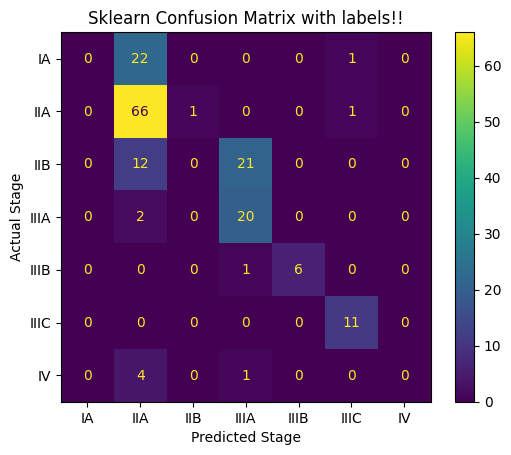

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=100, random_state=0)

# Train the model using the training sets
abc.fit(X_train, y_train)
abc_predictions = abc.predict(X_test)
cm = confusion_matrix(y_test, abc_predictions)
    #Create the Confusion Matrix Display Object(cmd_obj).
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[ 'IA', 'IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC','IV'])
    #The plot() function has to be called for the sklearn visualization
cmd_obj.plot()
    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!',
                    xlabel='Predicted Stage',
                    ylabel='Actual Stage')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
def print_scores( y_true, abc_predictions):

        acc_score = accuracy_score(y_true, abc_predictions)
        print("accuracy: ",acc_score)
        print(metrics.classification_report(y_true, abc_predictions, digits=3))

print_scores( y_test, abc_predictions)

accuracy:  0.6094674556213018
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        23
           1      0.623     0.971     0.759        68
           2      0.000     0.000     0.000        33
           3      0.465     0.909     0.615        22
           4      1.000     0.857     0.923         7
           5      0.846     1.000     0.917        11
           6      0.000     0.000     0.000         5

    accuracy                          0.609       169
   macro avg      0.419     0.534     0.459       169
weighted avg      0.408     0.609     0.483       169



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Sensitivity and Specificity - Ada Boost

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

print('Avg Sensitivity : ', TPR.sum()/7)
print('Avg Specificity :' ,TNR.sum()/7)

Avg Sensitivity :  0.5338317145039834
Avg Specificity : 0.9182123774258598


## **80:20 Train and Test Split Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=None)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 81
X_test 21
y_train 81
y_test 21


In [ ]:
print(X_test)

758     0
1344    2
736     2
40      1
214     5
1081    1
684     1
719     2
760     1
1613    6
370     1
502     0
1050    1
1008    0
878     1
1423    5
1589    3
167     1
1430    2
663     1
661     4
Name: Stage_new, dtype: int64


## **DECISION TREE 80:20**

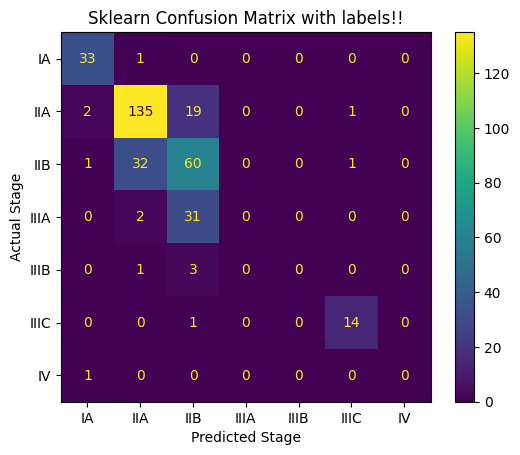

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
y_pred = dtree_model.predict(X_test)

# creating a confusion matrix

cm = confusion_matrix(y_test, y_pred)
    #Create the Confusion Matrix Display Object(cmd_obj).
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[ 'IA', 'IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC','IV'])

    #The plot() function has to be called for the sklearn visualization
cmd_obj.plot()

    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!',
                    xlabel='Predicted Stage',
                    ylabel='Actual Stage')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
def print_scores( y_true, y_pred):

        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        print(metrics.classification_report(y_true, y_pred, digits=3))

print_scores( y_test, y_pred)

accuracy:  0.7159763313609467
              precision    recall  f1-score   support

           0      0.892     0.971     0.930        34
           1      0.789     0.860     0.823       157
           2      0.526     0.638     0.577        94
           3      0.000     0.000     0.000        33
           4      0.000     0.000     0.000         4
           5      0.875     0.933     0.903        15
           6      0.000     0.000     0.000         1

    accuracy                          0.716       338
   macro avg      0.440     0.486     0.462       338
weighted avg      0.642     0.716     0.676       338



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

print('Avg Sensitivity : ', TPR.sum()/7)
print('Avg Specificity :' ,TNR.sum()/7)

Avg Sensitivity :  0.4860131503475493
Avg Specificity : 0.9372062359663736


## **GAUSSIAN NAIVE BAYES CLASSIFICATION 80:20**

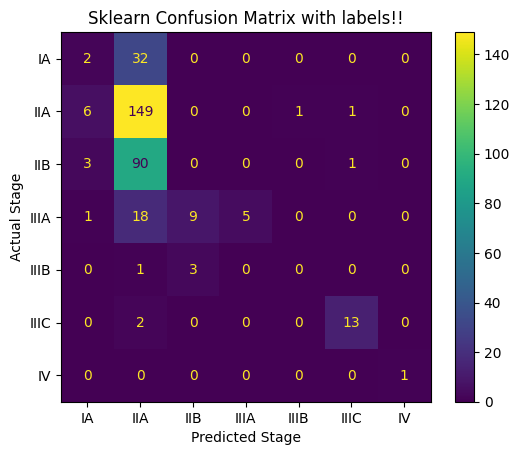

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
cm = confusion_matrix(y_test, gnb_predictions)
    #Create the Confusion Matrix Display Object(cmd_obj).
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[ 'IA', 'IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC','IV'])

    #The plot() function has to be called for the sklearn visualization
cmd_obj.plot()

    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!',
                    xlabel='Predicted Stage',
                    ylabel='Actual Stage')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
def print_scores( y_true,gnb_predictions ):

        acc_score = accuracy_score(y_true, gnb_predictions)
        print("accuracy: ",acc_score)
        print(metrics.classification_report(y_true, gnb_predictions, digits=3))
print_scores( y_test, gnb_predictions)

accuracy:  0.5029585798816568
              precision    recall  f1-score   support

           0      0.167     0.059     0.087        34
           1      0.510     0.949     0.664       157
           2      0.000     0.000     0.000        94
           3      1.000     0.152     0.263        33
           4      0.000     0.000     0.000         4
           5      0.867     0.867     0.867        15
           6      1.000     1.000     1.000         1

    accuracy                          0.503       338
   macro avg      0.506     0.432     0.411       338
weighted avg      0.393     0.503     0.384       338



In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

print('Avg Sensitivity : ', TPR.sum()/7)
print('Avg Specificity :' ,TNR.sum()/7)


Avg Sensitivity :  0.4322928476544063
Avg Specificity : 0.8740976748899733


# **KNN CLASSIFICATION 80:20**

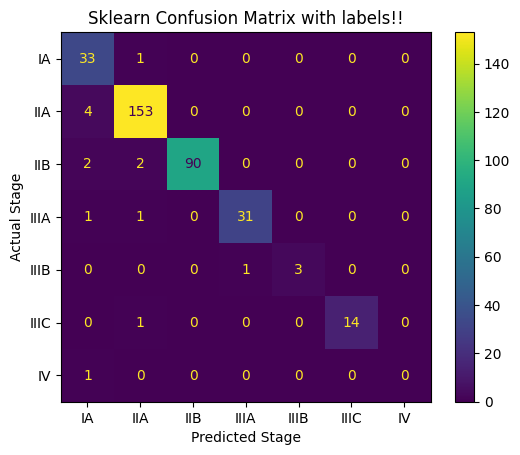

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

cm = confusion_matrix(y_test, knn_predictions)
    #Create the Confusion Matrix Display Object(cmd_obj).
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[ 'IA', 'IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC','IV'])

    #The plot() function has to be called for the sklearn visualization
cmd_obj.plot()

    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!',
                    xlabel='Predicted Stage',
                    ylabel='Actual Stage')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
def print_scores( y_true,knn_predictions ):

        acc_score = accuracy_score(y_true, knn_predictions)
        print("accuracy: ",acc_score)
        print(metrics.classification_report(y_true, knn_predictions, digits=3))
print_scores( y_test, knn_predictions)

accuracy:  0.9585798816568047
              precision    recall  f1-score   support

           0      0.805     0.971     0.880        34
           1      0.968     0.975     0.971       157
           2      1.000     0.957     0.978        94
           3      0.969     0.939     0.954        33
           4      1.000     0.750     0.857         4
           5      1.000     0.933     0.966        15
           6      0.000     0.000     0.000         1

    accuracy                          0.959       338
   macro avg      0.820     0.789     0.801       338
weighted avg      0.960     0.959     0.958       338



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

print('Avg Sensitivity : ', TPR.sum()/7)
print('Avg Specificity :' ,TNR.sum()/7)

Avg Sensitivity :  0.7893263727893799
Avg Specificity : 0.9918258875156373


# **SVM CLASSIFICATION 80:20**

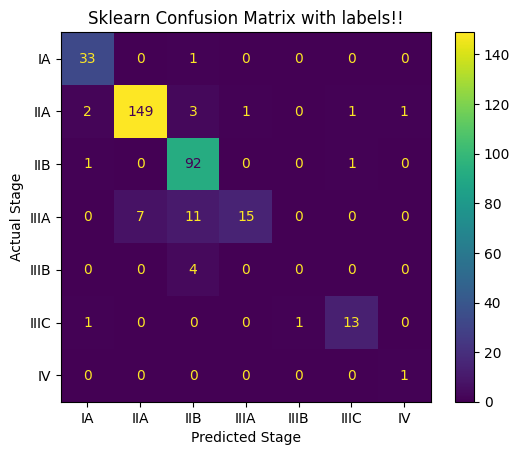

In [ ]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

cm = confusion_matrix(y_test, svm_predictions)
    #Create the Confusion Matrix Display Object(cmd_obj).
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[ 'IA', 'IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC','IV'])

    #The plot() function has to be called for the sklearn visualization
cmd_obj.plot()

    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!',
                    xlabel='Predicted Stage',
                    ylabel='Actual Stage')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
def print_scores( y_true,svm_predictions ):

        acc_score = accuracy_score(y_true, svm_predictions)
        print("accuracy: ",acc_score)
        print(metrics.classification_report(y_true, knn_predictions, digits=3))
print_scores( y_test, svm_predictions)

accuracy:  0.8964497041420119
              precision    recall  f1-score   support

           0      0.805     0.971     0.880        34
           1      0.968     0.975     0.971       157
           2      1.000     0.957     0.978        94
           3      0.969     0.939     0.954        33
           4      1.000     0.750     0.857         4
           5      1.000     0.933     0.966        15
           6      0.000     0.000     0.000         1

    accuracy                          0.959       338
   macro avg      0.820     0.789     0.801       338
weighted avg      0.960     0.959     0.958       338



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

print('Avg Sensitivity : ', TPR.sum()/7)
print('Avg Specificity :' ,TNR.sum()/7)

Avg Sensitivity :  0.745652620964117
Avg Specificity : 0.979266744234213


# **RANDOM FOREST CLASSIFICATION 80:20**

In [ ]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
# Create a Random forest Classifier
clf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
clf.fit(X_train, y_train)
rforest_predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, rforest_predictions)
    #Create the Confusion Matrix Display Object(cmd_obj).
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[ 'IA', 'IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC','IV'])
    #The plot() function has to be called for the sklearn visualization
cmd_obj.plot()
    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!',
                    xlabel='Predicted Stage',
                    ylabel='Actual Stage')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
plt.show()

ValueError: ignored

In [ ]:
def print_scores( y_true, rforest_predictions):

        acc_score = accuracy_score(y_true, rforest_predictions)
        print("accuracy: ",acc_score)
        print(metrics.classification_report(y_true, rforest_predictions, digits=3))

print_scores( y_test, rforest_predictions)

accuracy:  0.9585798816568047
              precision    recall  f1-score   support

           0      0.969     0.912     0.939        34
           1      0.957     0.981     0.969       157
           2      0.948     0.968     0.958        94
           3      0.969     0.939     0.954        33
           4      1.000     0.750     0.857         4
           5      1.000     0.867     0.929        15
           6      1.000     1.000     1.000         1

    accuracy                          0.959       338
   macro avg      0.977     0.917     0.944       338
weighted avg      0.959     0.959     0.958       338



In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

print('Avg Sensitivity : ', TPR.sum()/7)
print('Avg Specificity :' ,TNR.sum()/7)

Avg Sensitivity :  0.9166860197244515
Avg Specificity : 0.9906094287661914


Gradient Boost Classification 80:20

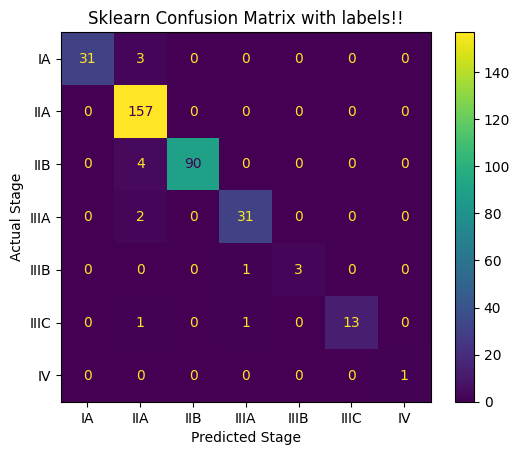

In [ ]:
# importing Gradient Boosting Classifier from assemble module
from sklearn.ensemble import GradientBoostingClassifier
# Create a Gradient Boost Classifier
gbc = GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=8 )

# Train the model using the training sets
gbc.fit(X_train, y_train)
gbc_predictions = gbc.predict(X_test)
cm = confusion_matrix(y_test, gbc_predictions)
    #Create the Confusion Matrix Display Object(cmd_obj).
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[ 'IA', 'IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC','IV'])
    #The plot() function has to be called for the sklearn visualization
cmd_obj.plot()
    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!',
                    xlabel='Predicted Stage',
                    ylabel='Actual Stage')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
def print_scores( y_true, gbc_predictions):

        acc_score = accuracy_score(y_true, gbc_predictions)
        print("accuracy: ",acc_score)
        print(metrics.classification_report(y_true, gbc_predictions, digits=3))

print_scores( y_test, gbc_predictions)

accuracy:  0.9644970414201184
              precision    recall  f1-score   support

           0      1.000     0.912     0.954        34
           1      0.940     1.000     0.969       157
           2      1.000     0.957     0.978        94
           3      0.939     0.939     0.939        33
           4      1.000     0.750     0.857         4
           5      1.000     0.867     0.929        15
           6      1.000     1.000     1.000         1

    accuracy                          0.964       338
   macro avg      0.983     0.918     0.947       338
weighted avg      0.966     0.964     0.964       338



In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

print('Avg Sensitivity : ', TPR.sum()/7)
print('Avg Specificity :' ,TNR.sum()/7)


Avg Sensitivity :  0.9178960172076567
Avg Specificity : 0.9911705720237557


# **ADA BOOST CLASSIFICATION 80:20**

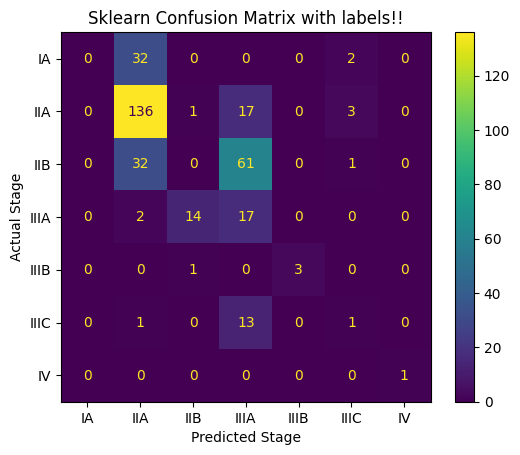

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=100, random_state=0)

# Train the model using the training sets
abc.fit(X_train, y_train)
abc_predictions = abc.predict(X_test)
cm = confusion_matrix(y_test, abc_predictions)
    #Create the Confusion Matrix Display Object(cmd_obj).
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[ 'IA', 'IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC','IV'])
    #The plot() function has to be called for the sklearn visualization
cmd_obj.plot()
    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!',
                    xlabel='Predicted Stage',
                    ylabel='Actual Stage')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
def print_scores( y_true, abc_predictions):

        acc_score = accuracy_score(y_true, abc_predictions)
        print("accuracy: ",acc_score)
        print(metrics.classification_report(y_true, abc_predictions, digits=3))

print_scores( y_test, abc_predictions)

accuracy:  0.46745562130177515
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        34
           1      0.670     0.866     0.756       157
           2      0.000     0.000     0.000        94
           3      0.157     0.515     0.241        33
           4      1.000     0.750     0.857         4
           5      0.143     0.067     0.091        15
           6      1.000     1.000     1.000         1

    accuracy                          0.467       338
   macro avg      0.424     0.457     0.421       338
weighted avg      0.348     0.467     0.392       338



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

print('Avg Sensitivity : ', TPR.sum()/7)
print('Avg Specificity :' ,TNR.sum()/7)

Avg Sensitivity :  0.456865745719249
Avg Specificity : 0.8924748537887071


# **70:30 TRAIN AND TEST SPLIT DATA**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 1183
X_test 507
y_train 1183
y_test 507


# **DECISION TREE 70:30**

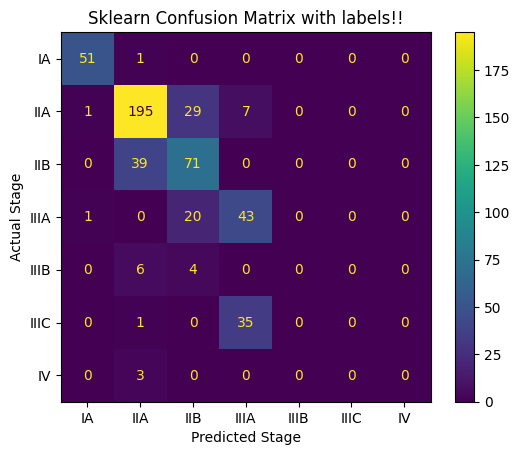

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
y_pred = dtree_model.predict(X_test)

# creating a confusion matrix

cm = confusion_matrix(y_test, y_pred)
    #Create the Confusion Matrix Display Object(cmd_obj).
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[ 'IA', 'IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC','IV'])

    #The plot() function has to be called for the sklearn visualization
cmd_obj.plot()

    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!',
                    xlabel='Predicted Stage',
                    ylabel='Actual Stage')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
def print_scores( y_true, y_pred):

        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        print(metrics.classification_report(y_true, y_pred, digits=3))

print_scores( y_test, y_pred)

accuracy:  0.7100591715976331
              precision    recall  f1-score   support

           0      0.962     0.981     0.971        52
           1      0.796     0.841     0.818       232
           2      0.573     0.645     0.607       110
           3      0.506     0.672     0.577        64
           4      0.000     0.000     0.000        10
           5      0.000     0.000     0.000        36
           6      0.000     0.000     0.000         3

    accuracy                          0.710       507
   macro avg      0.405     0.448     0.425       507
weighted avg      0.651     0.710     0.678       507



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

print('Avg Sensitivity : ', TPR.sum()/7)
print('Avg Specificity :' ,TNR.sum()/7)

Avg Sensitivity :  0.44837371680044097
Avg Specificity : 0.9407824039899335


# **GAUSIAN NAIVE BAYES 70:30**

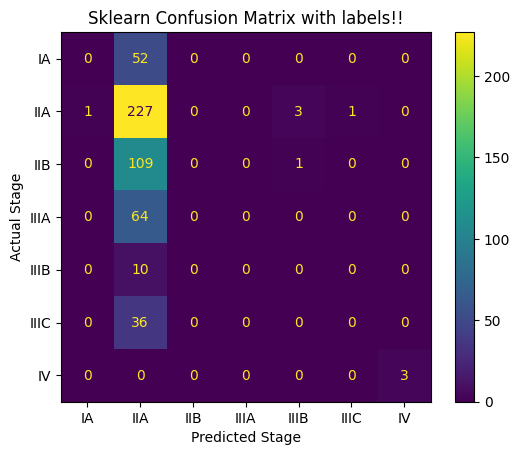

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
cm = confusion_matrix(y_test, gnb_predictions)
    #Create the Confusion Matrix Display Object(cmd_obj).
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[ 'IA', 'IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC','IV'])

    #The plot() function has to be called for the sklearn visualization
cmd_obj.plot()

    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!',
                    xlabel='Predicted Stage',
                    ylabel='Actual Stage')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
def print_scores( y_true,gnb_predictions ):

        acc_score = accuracy_score(y_true, gnb_predictions)
        print("accuracy: ",acc_score)
        print(metrics.classification_report(y_true, gnb_predictions, digits=3))
print_scores( y_test, gnb_predictions)

accuracy:  0.4536489151873767
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        52
           1      0.456     0.978     0.622       232
           2      0.000     0.000     0.000       110
           3      0.000     0.000     0.000        64
           4      0.000     0.000     0.000        10
           5      0.000     0.000     0.000        36
           6      1.000     1.000     1.000         3

    accuracy                          0.454       507
   macro avg      0.208     0.283     0.232       507
weighted avg      0.214     0.454     0.291       507



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

print('Avg Sensitivity : ', TPR.sum()/7)
print('Avg Specificity :' ,TNR.sum()/7)


Avg Sensitivity :  0.28263546798029554
Avg Specificity : 0.8574537457655274


# **KNN 70:30**

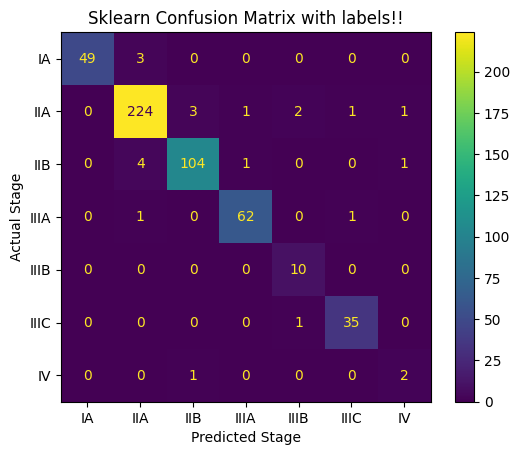

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

cm = confusion_matrix(y_test, knn_predictions)
    #Create the Confusion Matrix Display Object(cmd_obj).
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[ 'IA', 'IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC','IV'])

    #The plot() function has to be called for the sklearn visualization
cmd_obj.plot()

    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!',
                    xlabel='Predicted Stage',
                    ylabel='Actual Stage')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
def print_scores( y_true,knn_predictions ):

        acc_score = accuracy_score(y_true, knn_predictions)
        print("accuracy: ",acc_score)
        print(metrics.classification_report(y_true, knn_predictions, digits=3))
print_scores( y_test, knn_predictions)

accuracy:  0.9585798816568047
              precision    recall  f1-score   support

           0      1.000     0.942     0.970        52
           1      0.966     0.966     0.966       232
           2      0.963     0.945     0.954       110
           3      0.969     0.969     0.969        64
           4      0.769     1.000     0.870        10
           5      0.946     0.972     0.959        36
           6      0.500     0.667     0.571         3

    accuracy                          0.959       507
   macro avg      0.873     0.923     0.894       507
weighted avg      0.961     0.959     0.959       507



In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

print('Avg Sensitivity : ', TPR.sum()/7)
print('Avg Specificity :' ,TNR.sum()/7)

Avg Sensitivity :  0.9229883382900625
Avg Specificity : 0.991724013671299


# **SVM 70:30**

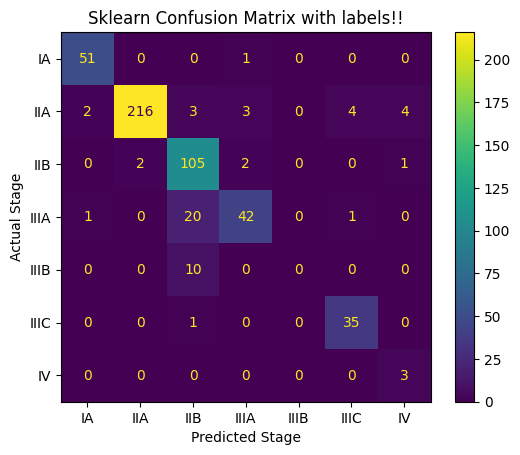

In [ ]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

cm = confusion_matrix(y_test, svm_predictions)
    #Create the Confusion Matrix Display Object(cmd_obj).
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[ 'IA', 'IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC','IV'])

    #The plot() function has to be called for the sklearn visualization
cmd_obj.plot()

    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!',
                    xlabel='Predicted Stage',
                    ylabel='Actual Stage')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
def print_scores( y_true,svm_predictions ):

        acc_score = accuracy_score(y_true, svm_predictions)
        print("accuracy: ",acc_score)
        print(metrics.classification_report(y_true, knn_predictions, digits=3))
print_scores( y_test, svm_predictions)

accuracy:  0.8915187376725838
              precision    recall  f1-score   support

           0      1.000     0.942     0.970        52
           1      0.966     0.966     0.966       232
           2      0.963     0.945     0.954       110
           3      0.969     0.969     0.969        64
           4      0.769     1.000     0.870        10
           5      0.946     0.972     0.959        36
           6      0.500     0.667     0.571         3

    accuracy                          0.959       507
   macro avg      0.873     0.923     0.894       507
weighted avg      0.961     0.959     0.959       507



In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

print('Avg Sensitivity : ', TPR.sum()/7)
print('Avg Specificity :' ,TNR.sum()/7)

Avg Sensitivity :  0.7849744843279326
Avg Specificity : 0.9809158835030762


# **RANDOM FOREST 70:30**

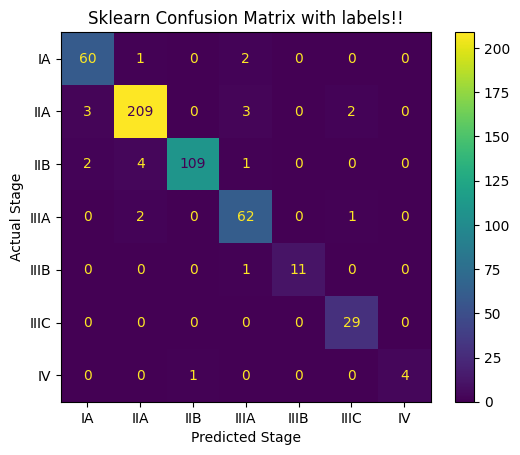

In [ ]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
# Create a Random forest Classifier
clf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
clf.fit(X_train, y_train)
rforest_predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, rforest_predictions)
    #Create the Confusion Matrix Display Object(cmd_obj).
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[ 'IA', 'IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC','IV'])
    #The plot() function has to be called for the sklearn visualization
cmd_obj.plot()
    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!',
                    xlabel='Predicted Stage',
                    ylabel='Actual Stage')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
def print_scores( y_true, rforest_predictions):

        acc_score = accuracy_score(y_true, rforest_predictions)
        print("accuracy: ",acc_score)
        print(metrics.classification_report(y_true, rforest_predictions, digits=3))

print_scores( y_test, rforest_predictions)

accuracy:  0.9546351084812623
              precision    recall  f1-score   support

           0      0.923     0.952     0.938        63
           1      0.968     0.963     0.965       217
           2      0.991     0.940     0.965       116
           3      0.899     0.954     0.925        65
           4      1.000     0.917     0.957        12
           5      0.906     1.000     0.951        29
           6      1.000     0.800     0.889         5

    accuracy                          0.955       507
   macro avg      0.955     0.932     0.941       507
weighted avg      0.956     0.955     0.955       507



In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

print('Avg Sensitivity : ', TPR.sum()/7)
print('Avg Specificity :' ,TNR.sum()/7)

Avg Sensitivity :  0.9508069036790217
Avg Specificity : 0.9895527446555138


# **DEMO RESULT**

In [ ]:
new_input = [[3,2,0]]

new_output = clf.predict(new_input)

print(new_input, new_output)

[[3, 2, 0]] [3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# **Gradient Boost Classification 70:30**

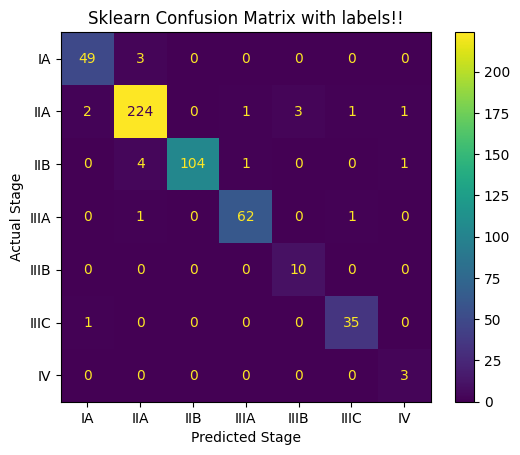

In [ ]:
# importing Gradient Boosting Classifier from assemble module
from sklearn.ensemble import GradientBoostingClassifier
# Create a Gradient Boost Classifier
gbc = GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=8 )

# Train the model using the training sets
gbc.fit(X_train, y_train)
gbc_predictions = gbc.predict(X_test)
cm = confusion_matrix(y_test, gbc_predictions)
    #Create the Confusion Matrix Display Object(cmd_obj).
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[ 'IA', 'IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC','IV'])
    #The plot() function has to be called for the sklearn visualization
cmd_obj.plot()
    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!',
                    xlabel='Predicted Stage',
                    ylabel='Actual Stage')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
def print_scores( y_true, gbc_predictions):

        acc_score = accuracy_score(y_true, gbc_predictions)
        print("accuracy: ",acc_score)
        print(metrics.classification_report(y_true, gbc_predictions, digits=3))

print_scores( y_test, gbc_predictions)

accuracy:  0.960552268244576
              precision    recall  f1-score   support

           0      0.942     0.942     0.942        52
           1      0.966     0.966     0.966       232
           2      1.000     0.945     0.972       110
           3      0.969     0.969     0.969        64
           4      0.769     1.000     0.870        10
           5      0.946     0.972     0.959        36
           6      0.600     1.000     0.750         3

    accuracy                          0.961       507
   macro avg      0.885     0.971     0.918       507
weighted avg      0.964     0.961     0.961       507



In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

print('Avg Sensitivity : ', TPR.sum()/7)
print('Avg Specificity :' ,TNR.sum()/7)

Avg Sensitivity :  0.9706073859091101
Avg Specificity : 0.9922214651223308


# **ADA BOOST CLASSIFICATION 70:30**

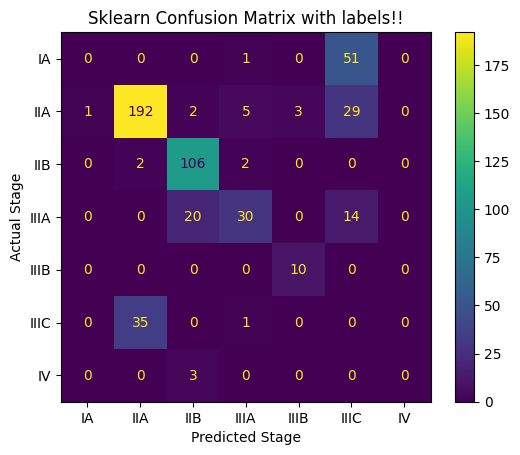

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=100, random_state=0)

# Train the model using the training sets
abc.fit(X_train, y_train)
abc_predictions = abc.predict(X_test)
cm = confusion_matrix(y_test, abc_predictions)
    #Create the Confusion Matrix Display Object(cmd_obj).
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[ 'IA', 'IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC','IV'])
    #The plot() function has to be called for the sklearn visualization
cmd_obj.plot()
    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!',
                    xlabel='Predicted Stage',
                    ylabel='Actual Stage')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
def print_scores( y_true, abc_predictions):

        acc_score = accuracy_score(y_true, abc_predictions)
        print("accuracy: ",acc_score)
        print(metrics.classification_report(y_true, abc_predictions, digits=3))

print_scores( y_test, abc_predictions)

accuracy:  0.6666666666666666
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        52
           1      0.838     0.828     0.833       232
           2      0.809     0.964     0.880       110
           3      0.769     0.469     0.583        64
           4      0.769     1.000     0.870        10
           5      0.000     0.000     0.000        36
           6      0.000     0.000     0.000         3

    accuracy                          0.667       507
   macro avg      0.455     0.466     0.452       507
weighted avg      0.671     0.667     0.663       507



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)

print('Avg Sensitivity : ', TPR.sum()/7)
print('Avg Specificity :' ,TNR.sum()/7)

Avg Sensitivity :  0.4657103672189879
Avg Specificity : 0.9391938335890792


## **SECTION III**

Below code is for experimental basis, doesn't hold any importance

In [ ]:
print(cm)

[[22  2  1  0  0  0  0]
 [ 0 62 10  3  0  0  0]
 [ 1  9 27  1  0  0  0]
 [ 0  1  9  7  0  0  0]
 [ 0  1  2  0  0  0  0]
 [ 0  0  1  9  0  0  0]
 [ 1  0  1  0  0  0  0]]


In [ ]:
# for index, row in combined_df1.iterrows():
#   if ord(row['T'])>=97 and ord(row['T'])<=122:
#     print('YES')

YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES
YES


In [ ]:
 # pre_score = precision_score(y_true, y_pred)
        # print("precision: ",pre_score)
        #rec_score = recall_score(y_true, y_pred)
       # print("recall: ",rec_score)
        #f_score = f1_score(y_true, y_pred, average='weighted')
       # print("f1_score: ",f_score)


       # print(ACC.sum()/7)